# AI ASSIGNMENT -2

## Importing necessary libraries

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation

## Reading the csv file

In [109]:
df = pd.read_csv("C:/Users/svneh/Downloads/drug200.csv")

In [110]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [111]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


## Displaying the information about dataset

In [112]:
df.size

1200

In [113]:
df.shape

(200, 6)

In [114]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [116]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [117]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [118]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [119]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [120]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [121]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [122]:
for column in df.columns:
    print(column)

Age
Sex
BP
Cholesterol
Na_to_K
Drug


In [123]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [124]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [125]:
df.cov()

,Age,Na_to_K
Age,273.714347,-7.543752
Na_to_K,-7.543752,52.185533


## Data Preprocessing

In [126]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

In [127]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [128]:
## Hence there are no null values in the data set

In [129]:
duplicates = df.duplicated()
duplicates.value_counts()

False    200
dtype: int64

In [130]:
## Hence there are no duplicates in the data set

<Axes: >

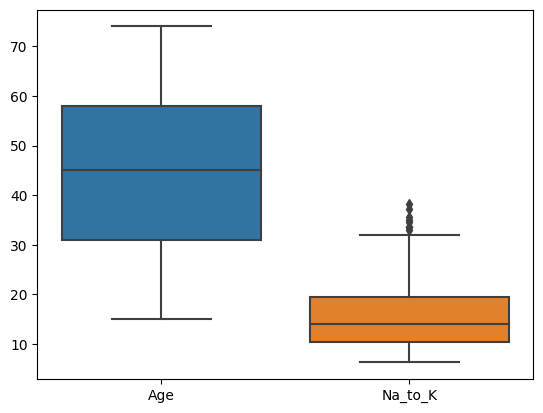

In [131]:
sns.boxplot(df)

<Axes: >

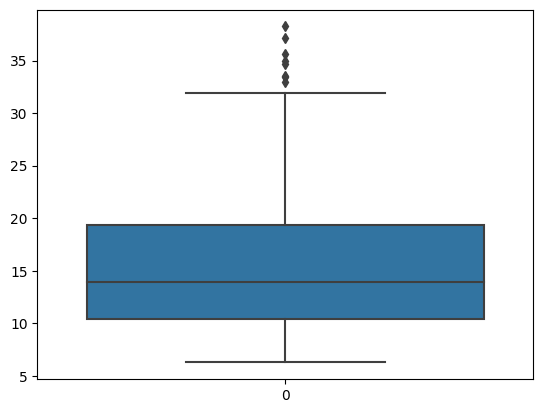

In [132]:
sns.boxplot(df['Na_to_K'])

In [133]:
q1 = df['Na_to_K'].quantile(.25)
q2 = df['Na_to_K'].quantile(.75)

In [134]:
q1

10.4455

In [135]:
q2

19.38

In [136]:
IQR = q2- q1
IQR

8.9345

In [137]:
upper_limit = q2+1.5*IQR
lower_limit = q1-1.5*IQR

In [138]:
df = df[df['Na_to_K']<upper_limit]

<Axes: >

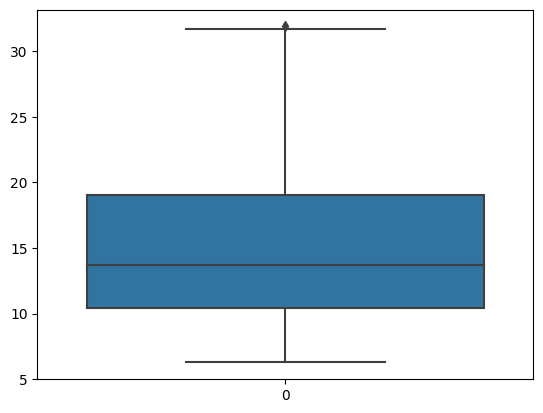

In [139]:
sns.boxplot(df['Na_to_K'])

In [140]:
## There fore the outliers are also removed from the data set
## Hence data Preprocessing is done

## Visualization

<Axes: >

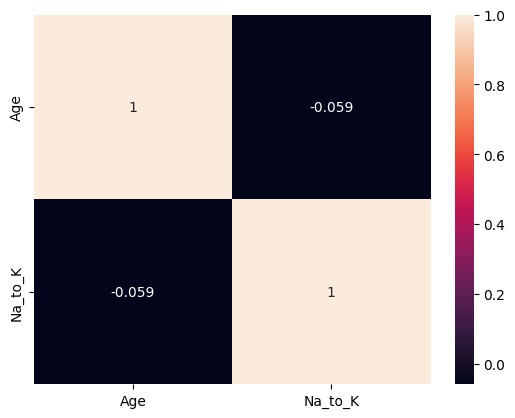

In [141]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

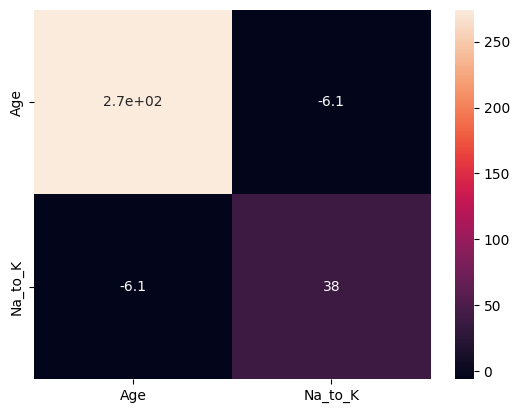

In [142]:
sns.heatmap(df.cov(),annot=True)

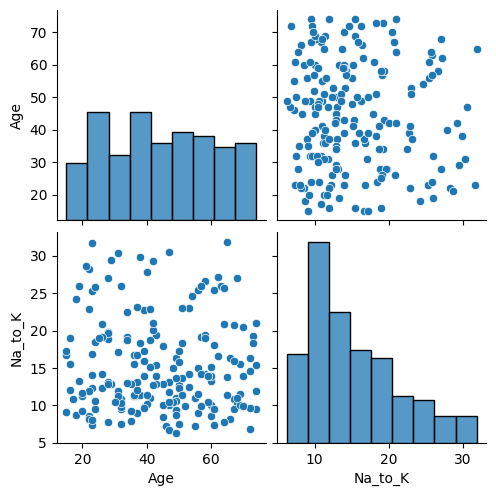

In [143]:
sns.pairplot(df)

<Axes: xlabel='Sex', ylabel='count'>

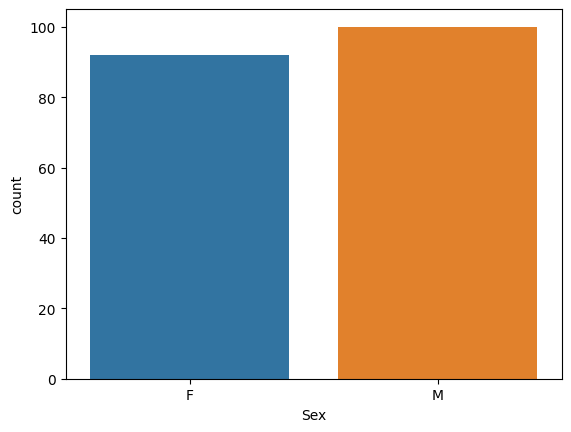

In [144]:
sns.countplot(x = df['Sex'])

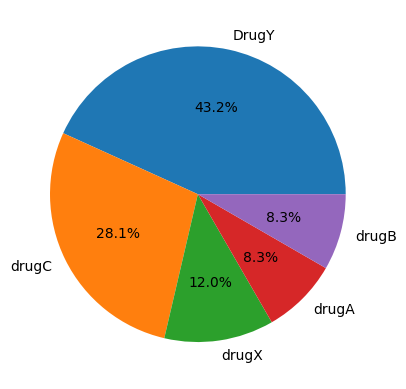

In [145]:
plt.pie(df['Drug'].value_counts(),autopct = '%1.1f%%',labels = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'])
plt.show()

<Axes: xlabel='Na_to_K', ylabel='Density'>

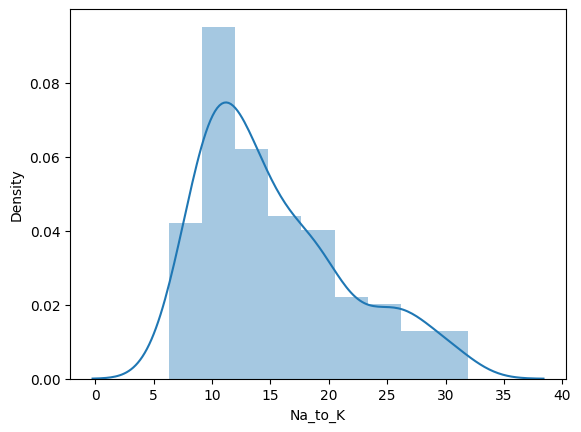

In [146]:
sns.distplot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Density'>

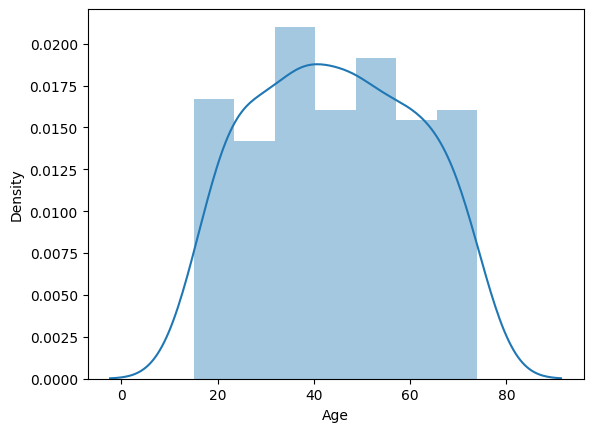

In [147]:
sns.distplot(df['Age'])

<Axes: xlabel='BP', ylabel='count'>

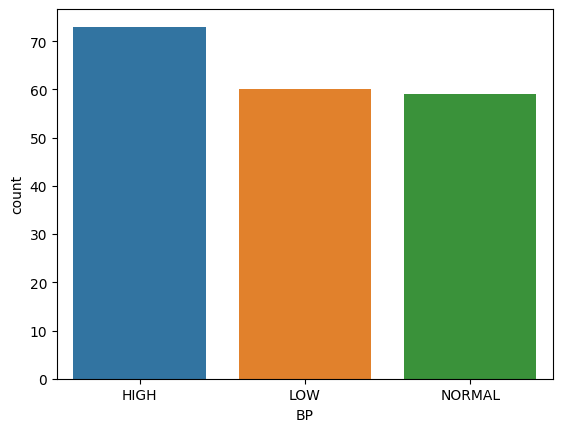

In [148]:
sns.countplot(x = df['BP'])

<Axes: xlabel='Cholesterol', ylabel='count'>

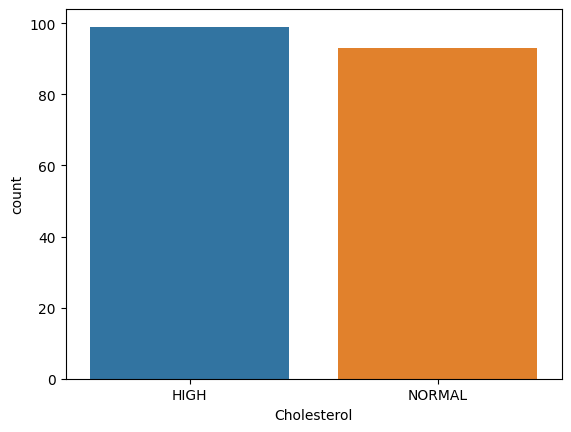

In [149]:
sns.countplot(x = df['Cholesterol'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

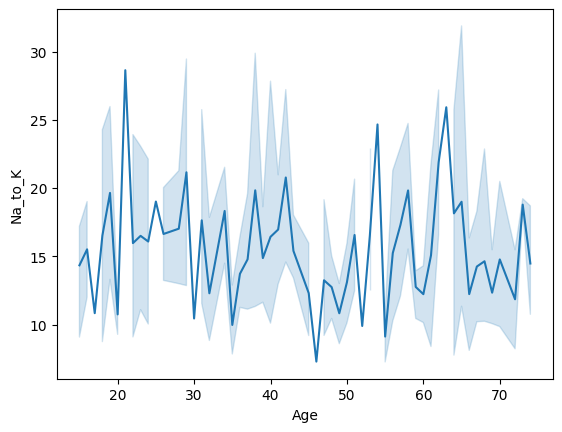

In [150]:
sns.lineplot(x = df['Age'],y = df['Na_to_K'])

## Splitting

In [151]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [152]:
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [153]:
y.head(2)

0    DrugY
1    drugC
Name: Drug, dtype: object

In [154]:
x['Sex'] = x['Sex'].replace({'F':0,'M':1})
x['BP'] = x['BP'].replace({'HIGH':0,'LOW':1,'NORMAL':2})
x['Cholesterol'] = x['Cholesterol'].replace({'HIGH':0,'NORMAL':1})

In [155]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [156]:

y = pd.get_dummies(df.iloc[:,5:]).values
y
   

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0,

## Splitting to training and test set

In [157]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [158]:
(xtrain.shape,ytrain.shape)

((153, 5), (153, 5))

In [159]:
(xtest.shape,ytest.shape)

((39, 5), (39, 5))

In [160]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
42,50,1,2,1,15.790
25,28,0,0,1,18.809
8,60,1,2,0,15.171
41,58,0,0,1,14.239
164,16,1,0,1,19.007


In [161]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
63,45,1,1,1,8.370
11,34,0,0,1,19.199
178,39,1,2,0,15.969
87,69,1,1,0,15.478
150,49,1,0,1,8.700


In [162]:
ytrain

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0,

In [163]:
ytest

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [189]:

# ANN Model

model = Sequential()
model.add(Dense(16,input_dim=5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [190]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [191]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 16)                96        
                                                                 
 dense_60 (Dense)            (None, 32)                544       
                                                                 
 dense_61 (Dense)            (None, 64)                2112      
                                                                 
 dense_62 (Dense)            (None, 5)                 325       
                                                                 
Total params: 3,077
Trainable params: 3,077
Non-trainable params: 0
_________________________________________________________________


In [193]:

model.fit(xtrain,ytrain,epochs=20,batch_size=3,validation_data=(xtest,ytest))

Epoch 1/20
51/51 [==============================] - 0s 7ms/step - loss: 0.7994 - accuracy: 0.6667 - val_loss: 0.8209 - val_accuracy: 0.6154
Epoch 2/20
51/51 [==============================] - 0s 5ms/step - loss: 0.7939 - accuracy: 0.6928 - val_loss: 0.8677 - val_accuracy: 0.6154
Epoch 3/20
51/51 [==============================] - 0s 4ms/step - loss: 0.7106 - accuracy: 0.7582 - val_loss: 0.7848 - val_accuracy: 0.6923
Epoch 4/20
51/51 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.7124 - val_loss: 0.7179 - val_accuracy: 0.6923
Epoch 5/20
51/51 [==============================] - 0s 5ms/step - loss: 0.7261 - accuracy: 0.7059 - val_loss: 0.8736 - val_accuracy: 0.5897
Epoch 6/20
51/51 [==============================] - 0s 5ms/step - loss: 0.6494 - accuracy: 0.7320 - val_loss: 0.6647 - val_accuracy: 0.7179
Epoch 7/20
51/51 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.7059 - val_loss: 0.6324 - val_accuracy: 0.7436
Epoch 8/20
51/51 [==

In [194]:
# Testing the model

ypred = reg_model.predict(xtest)

2/2 [==============================] - 0s 3ms/step


In [200]:

model.predict([[50,1,2,0,18.809]])

1/1 [==============================] - 0s 77ms/step


array([[9.3680674e-01, 5.6954334e-03, 1.5264448e-05, 2.2414135e-02,
        3.5068363e-02]], dtype=float32)